## Table of content
    I. Import some libraries
    II. Load the data into the data frame
    III. Exploratory Data Analysis
        1. Display the top 5 rows
        2. Display the 5 bottom rows
        3. Checking the type of data
        4. View summary of dataset
        5. Data cleaning
    IV. Machine Learning
        1. Setting feature vector and target variable
        2. Split data into separate training and test set
        3. Feature Scaling
        4. Logistic Regression model with all features
        5. Logistic Regression with PCA
        6. Number of features needed for retaining 99.5% variance in the data
        7. Plot explained variance ratio with number of dimensions
     V. References
                

## I. Import some libraries
    •	Pandas for manipulating and analyzing tabular data
    •	NumPy for performing numerical and statistical calculations
    •	Matplotlib.pyplot and Seaborn for data visualization
    •	warnings to avoid being distracted by irrelevant messages and focus on your main task
    •	Datetime to convert student age to Year of birth 
    

In [46]:
import pandas as pd
import numpy as np
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## II. Load the data into the data frame

In [47]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

## III. Exploratory Data Analysis 
    We are going to explore the data to have insights into the data

   ### 1. To display the top 5 rows

In [48]:
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


 ### 2. To display the bottom 5 rows

In [49]:
df.tail(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
925715,241605270,02/11/2024 12:00:00 AM,02/11/2024 12:00:00 AM,1920,16,Foothill,1681,2,888,TRESPASSING,...,AA,Adult Arrest,888.0,NaN,NaN,NaN,8700 SHARP AV,NaN,34.2278,-118.4051
925716,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
925717,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
925718,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
925719,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460


 ### 3. Drop variables of no interest to us

In [50]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [51]:
df1 = df.drop(columns=["Date Rptd", "AREA", "AREA NAME","Rpt Dist No", "Part 1-2", "Crm Cd", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4",
                "Crm Cd Desc", "Mocodes", "Premis Cd", "Premis Desc", "Weapon Used Cd", "Weapon Desc", "Status", "Status Desc", "Cross Street",])

In [52]:
df1.head(5)

,DR_NO,DATE OCC,TIME OCC,Vict Age,Vict Sex,Vict Descent,Crm Cd 1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,2130,0,M,O,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/08/2020 12:00:00 AM,1800,47,M,O,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/04/2020 12:00:00 AM,1700,19,X,X,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,03/10/2020 12:00:00 AM,2037,19,M,O,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/17/2020 12:00:00 AM,1200,28,M,H,354.0,1900 TRANSIENT,34.0944,-118.3277


### 3. Checking the type of data

In [53]:
df1.dtypes

DR_NO             int64
DATE OCC         object
TIME OCC          int64
Vict Age          int64
Vict Sex         object
Vict Descent     object
Crm Cd 1        float64
LOCATION         object
LAT             float64
LON             float64
dtype: object

## 4. View summary of dataset too

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925720 entries, 0 to 925719
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DR_NO         925720 non-null  int64  
 1   DATE OCC      925720 non-null  object 
 2   TIME OCC      925720 non-null  int64  
 3   Vict Age      925720 non-null  int64  
 4   Vict Sex      802562 non-null  object 
 5   Vict Descent  802552 non-null  object 
 6   Crm Cd 1      925709 non-null  float64
 7   LOCATION      925720 non-null  object 
 8   LAT           925720 non-null  float64
 9   LON           925720 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 70.6+ MB


#### - Convert 'DATE OCC' type objet to datetime type and keep only the date

In [55]:
df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'])

In [56]:
df1['DATE OCC'] = df1['DATE OCC'].dt.date

In [57]:
print(df1['DATE OCC'].head(10))

0    2020-03-01
1    2020-02-08
2    2020-11-04
3    2020-03-10
4    2020-08-17
5    2020-12-01
6    2020-07-03
7    2020-05-12
8    2020-12-09
9    2020-12-31
Name: DATE OCC, dtype: object


#### - Convert 'TIME OCC' type int64 to datetime type and keep only the time

The values in the 'TIME OCC' column are stored as integers representing hours and minutes in 24-hour format, so we'll convert them to datetime type.

In [58]:
# Convert 'TIME OCC' column to str type for easier handling

df1['TIME OCC'] = df1['TIME OCC'].astype(str)

In [59]:
# Add a zero on the left if necessary to ensure that each value has at least 4 digits

df1['TIME OCC'] = df1['TIME OCC'].str.zfill(4)

In [60]:
# Add a separator between hours and minutes

df1['TIME OCC'] = df1['TIME OCC'].str.slice(0, 2) + ':' + df1['TIME OCC'].str.slice(2, 4)

In [61]:
print(df1['TIME OCC'].head(5))

0    21:30
1    18:00
2    17:00
3    20:37
4    12:00
Name: TIME OCC, dtype: object


In [62]:
print(df1['TIME OCC'].tail(5))

925715    19:20
925716    07:20
925717    23:30
925718    15:10
925719    01:00
Name: TIME OCC, dtype: object


In [63]:
df1.shape

(925720, 10)

In [64]:
df1.isnull().sum()

DR_NO                0
DATE OCC             0
TIME OCC             0
Vict Age             0
Vict Sex        123158
Vict Descent    123168
Crm Cd 1            11
LOCATION             0
LAT                  0
LON                  0
dtype: int64

In [65]:
duplicate_rows_df1 = df1[df1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df1.shape)

number of duplicate rows:  (0, 10)


## Rename columns

In [66]:
df1.rename(columns = {'DR_NO':'Division of Records', 'DATE OCC':'Crime date', 'TIME OCC':'Crime time', 'Vict Descent':'Race', 'Crm Cd 1':'Crime Com'}, inplace =True)

In [67]:
df1

,Division of Records,Crime date,Crime time,Vict Age,Vict Sex,Race,Crime Com,LOCATION,LAT,LON
0,190326475,2020-03-01,21:30,0,M,O,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-08,18:00,47,M,O,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-04,17:00,19,X,X,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2020-03-10,20:37,19,M,O,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,2020-08-17,12:00,28,M,H,354.0,1900 TRANSIENT,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...
925715,241605270,2024-02-11,19:20,79,M,O,888.0,8700 SHARP AV,34.2278,-118.4051
925716,241604405,2024-01-13,07:20,36,M,H,230.0,8700 LANKERSHIM BL,34.2271,-118.3878
925717,242106032,2024-02-17,23:30,44,F,O,420.0,22700 NAPA ST,34.2260,-118.6214
925718,242004546,2024-01-16,15:10,80,F,O,624.0,HOBART BL,34.0690,-118.3054


## Check the missing values

In [68]:
df1.isnull().sum()

Division of Records         0
Crime date                  0
Crime time                  0
Vict Age                    0
Vict Sex               123158
Race                   123168
Crime Com                  11
LOCATION                    0
LAT                         0
LON                         0
dtype: int64

#### - Missing values in the variable 'Vict Sex'

In [69]:
unique_values = df1['Vict Sex'].unique()

In [70]:
print(unique_values)

['M' 'X' 'F' nan 'H' '-']


In [71]:
counting = df1['Vict Sex'].value_counts(dropna=False)
print(counting)

Vict Sex
M      379033
F      337982
NaN    123158
X       85440
H         106
-           1
Name: count, dtype: int64


#### - Missing values in the variable 'Vict Descent'

In [72]:
unique_valuess = df1['Race'].unique()
print(unique_valuess)

['O' 'X' 'H' 'B' 'W' nan 'A' 'C' 'K' 'J' 'F' 'I' 'V' 'S' 'P' 'Z' 'G' 'U'
 'D' 'L' '-']


In [73]:
count = df1['Race'].value_counts(dropna=False)
print(count)

Race
H      281383
W      187081
B      129712
NaN    123168
X       93926
O       73011
A       20311
K        5085
F        4002
C        3712
J        1305
V         987
I         882
Z         458
P         250
U         190
D          75
G          67
L          63
S          50
-           2
Name: count, dtype: int64


#### - Missing values in the variable 'Crime Com'

In [74]:
unique_val = df1['Crime Com'].unique()
print(unique_val)

[510. 330. 480. 343. 354. 624. 812. 810. 230. 956. 341. 930. 668. 420.
 813. 310. 903. 440. 626. 762. 441. 331. 946. 210. 662. 860. 236. 661.
 901. 442. 740. 761. 649. 845. 121. 745. 627. 653. 821. 928. 815. 940.
 625. 352. 648. 886. 666. 921. 932. 900. 820. 439. 760. 954. 434. 235.
 220. 654. 922. 670. 850. 237. 763. 345. 888. 320. 122. 753. 805. 822.
 520. 806. 906. 437. 410. 350. 623. 522. 450. 890. 755. 231. 664. 251.
 951. 920. 250. 470. 902. 647. 651. 910. 110. 351. 421. 444. 814. 756.
 433. 931. 435. 438. 443. 660. 950. 622. 943. 487.  nan 949. 933. 865.
 474. 652. 113. 446. 475. 471. 451. 436. 521. 485. 349. 944. 942. 347.
 353. 430. 870. 473. 880. 452. 924. 840. 948. 884. 904. 830. 432. 882.
 445. 926.]


In [75]:
countc = df1['Crime Com'].value_counts(dropna=False)
print(countc)

Crime Com
510.0    99433
624.0    73704
330.0    57149
354.0    57093
310.0    56738
         ...  
904.0        5
830.0        5
430.0        4
445.0        2
926.0        1
Name: count, Length: 142, dtype: int64


#### - We are going to replace the missing values by Unknow 'X' for 'Vict Sex', 'Vict Descent' and '510.0' for 'Crim Com'

In [76]:
replacement = {'Vict Sex': 'X', 'Race': 'X', 'Crime Com' : '510.0'}
df2 = df1.fillna(replacement)
print(df2)

        Division of Records  Crime date Crime time  Vict Age Vict Sex Race  \
0                 190326475  2020-03-01      21:30         0        M    O   
1                 200106753  2020-02-08      18:00        47        M    O   
2                 200320258  2020-11-04      17:00        19        X    X   
3                 200907217  2020-03-10      20:37        19        M    O   
4                 220614831  2020-08-17      12:00        28        M    H   
...                     ...         ...        ...       ...      ...  ...   
925715            241605270  2024-02-11      19:20        79        M    O   
925716            241604405  2024-01-13      07:20        36        M    H   
925717            242106032  2024-02-17      23:30        44        F    O   
925718            242004546  2024-01-16      15:10        80        F    O   
925719            240104953  2024-01-15      01:00         0        X    X   

       Crime Com                                  LOCATION     

In [77]:
df2.isnull().sum()

Division of Records    0
Crime date             0
Crime time             0
Vict Age               0
Vict Sex               0
Race                   0
Crime Com              0
LOCATION               0
LAT                    0
LON                    0
dtype: int64

In [78]:
df2.count()

Division of Records    925720
Crime date             925720
Crime time             925720
Vict Age               925720
Vict Sex               925720
Race                   925720
Crime Com              925720
LOCATION               925720
LAT                    925720
LON                    925720
dtype: int64

#### *Observation*
- No missing values anymore in our dataFrame

In [79]:
df2.head(5)

,Division of Records,Crime date,Crime time,Vict Age,Vict Sex,Race,Crime Com,LOCATION,LAT,LON
0,190326475,2020-03-01,21:30,0,M,O,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-08,18:00,47,M,O,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-04,17:00,19,X,X,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2020-03-10,20:37,19,M,O,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,2020-08-17,12:00,28,M,H,354.0,1900 TRANSIENT,34.0944,-118.3277


In [121]:
counting = df2['Vict Age'].value_counts(dropna=False)
print(counting)

Vict Age
31    254297
30     20914
35     20519
29     19947
28     19665
       ...  
94       101
95        94
96        92
97        69
98        69
Name: count, Length: 98, dtype: int64


#### *Observation*
 - The age value is problematic in some places: as age negative, equal = zero, etc. We will use Descriptive statistics to have insight into data.
 - We have a single victim aged 120. We are going to remove it because it's rare or exceptional.
    

In [124]:
# Delete rows where age equals 120
df2 = df2[df2['Vict Age'] != 120]

print(df2['Vict Age'].value_counts())

Vict Age
31    254297
30     20914
35     20519
29     19947
28     19665
       ...  
94       101
95        94
96        92
97        69
98        69
Name: count, Length: 98, dtype: int64


## Descriptive statistics

In [125]:
print(df2['Vict Age'].describe())

count    925719.000000
mean         37.402732
std          13.996822
min           2.000000
25%          31.000000
50%          31.000000
75%          45.000000
max          99.000000
Name: Vict Age, dtype: float64


#### *Data Analysis*
- The average age is around 29.55.
- The standard deviation is around 21.86, indicating some age dispersion around the mean.
- The minimum age is -4 years, which is an outlier.
- The quartiles show that 25% of values are less than or equal to 0, 50% of values are less than or equal to 31
  and 75% of values are less than or equal to 45.
- The maximum age is 99.
#### *Conclusion*
- We decided to replace these 25% of values that are less than or equal to 0 with the median of the age distribution.
  Since the median is a measure of central tendency which is robust to outliers.
- We have some victims with a negative age, which will be replace by the median too.

#### *Median of the 'Vict Age' column*

In [126]:
median_age = df2['Vict Age'].median()

# Replace values equal to 0 by the median
df2.loc[df2['Vict Age'] == 0, 'Vict Age'] = median_age

# Replace negative values by the median
df2.loc[df1['Vict Age'] < 0, 'Vict Age'] = median_age

print(df2['Vict Age'].describe())

count    925719.000000
mean         37.402732
std          13.996822
min           2.000000
25%          31.000000
50%          31.000000
75%          45.000000
max          99.000000
Name: Vict Age, dtype: float64


In [127]:
unique_ages = df2['Vict Age'].unique()
print(unique_ages)

[31 47 19 28 41 25 27 24 26  8  7 13 56 22 23 30 57 12 46 51 37 20 29 33
 34 15 65 59  9 35 50 64 79 40 44 32 16 21 42  6 72 10 60 36 18 17  5 39
 62 58 63 14 71 69 49 38 61 43 45 78 67 53 54 11 48 73 52 68 81 80  3 55
 89 70 77 83 91 82 75 76 74  4  2 66 84 87 86 85 90 99 96 88 92 94 93 95
 97 98]


In [128]:
print(df2['Vict Age'].value_counts())

Vict Age
31    254297
30     20914
35     20519
29     19947
28     19665
       ...  
94       101
95        94
96        92
97        69
98        69
Name: count, Length: 98, dtype: int64


In [129]:
miss_val = df2['Vict Age'].isnull().sum() 
print("Missing values in age column :", miss_val)

Missing values in age column : 0


In [130]:
df2.head()

,Division of Records,Crime date,Crime time,Vict Age,Vict Sex,Race,Crime Com,LOCATION,LAT,LON
0,190326475,2020-03-01,21:30,31,M,O,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-08,18:00,47,M,O,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-04,17:00,19,X,X,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2020-03-10,20:37,19,M,O,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,2020-08-17,12:00,28,M,H,354.0,1900 TRANSIENT,34.0944,-118.3277


## III. Some studies on crimes committed

### 1. Create a bar chart according to age:
To visualize the distribution of victims according to age

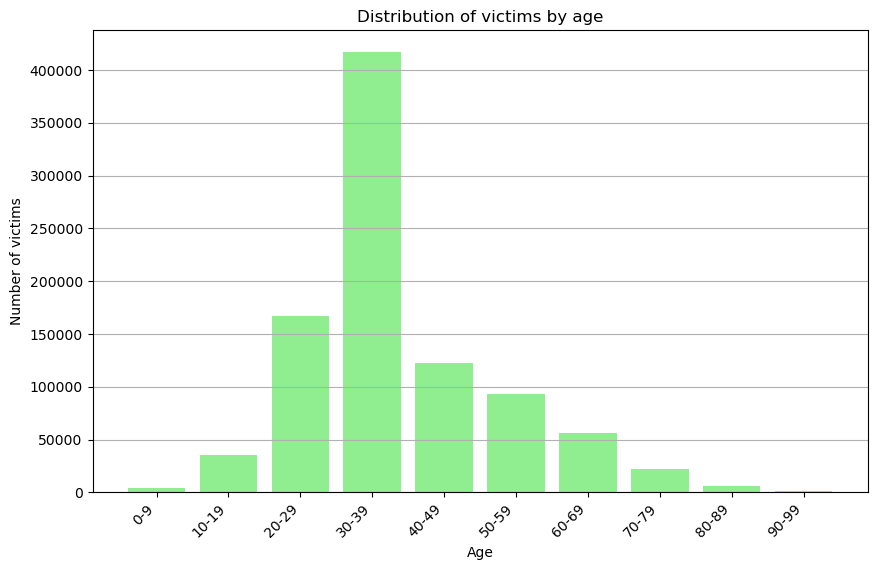

In [131]:
# Group ages by category
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
age_categories = pd.cut(df2['Vict Age'], bins=bins, labels=labels, right=False)

# Counts the number of victims in each category
age_counts = age_categories.value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='lightgreen')

# Graphic customization
plt.title('Distribution of victims by age')
plt.xlabel('Age')
plt.ylabel('Number of victims')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')


### 2. Create a bar chart with male, female and unknow age distributions:
A bar chart with male, female and unknow age distributions plotted on the same graph, allowing for easy comparison between the three groups 

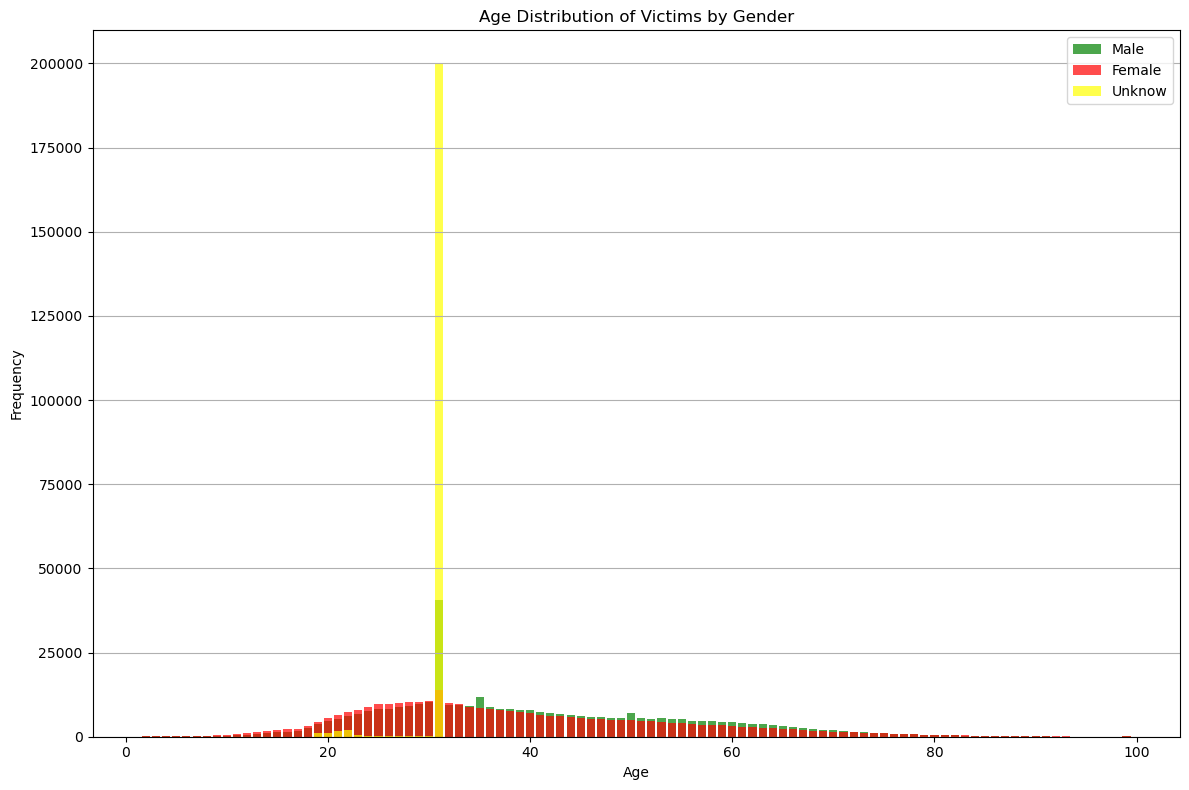

In [132]:
# Filter the data for each gender
male_data = df2[df2['Vict Sex'] == 'M']
female_data = df2[df2['Vict Sex'] == 'F']
unknow_data = df2[df2['Vict Sex'] == 'X']

# Calculate age counts for each gender
male_age_counts = male_data['Vict Age'].value_counts().sort_index()
female_age_counts = female_data['Vict Age'].value_counts().sort_index()
unknow_age_counts = unknow_data['Vict Age'].value_counts().sort_index()

# Create a bar chart for age distribution by gender
plt.figure(figsize=(12, 8))

plt.bar(male_age_counts.index, male_age_counts.values, color='green', alpha=0.7, label='Male')
plt.bar(female_age_counts.index, female_age_counts.values, color='red', alpha=0.7, label='Female')
plt.bar(unknow_age_counts.index, unknow_age_counts.values, color='yellow', alpha=0.7, label='Unknow')

plt.title('Age Distribution of Victims by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

### 3. Create a bar chart of victims by race:
bar chart comparing the number of victims by race

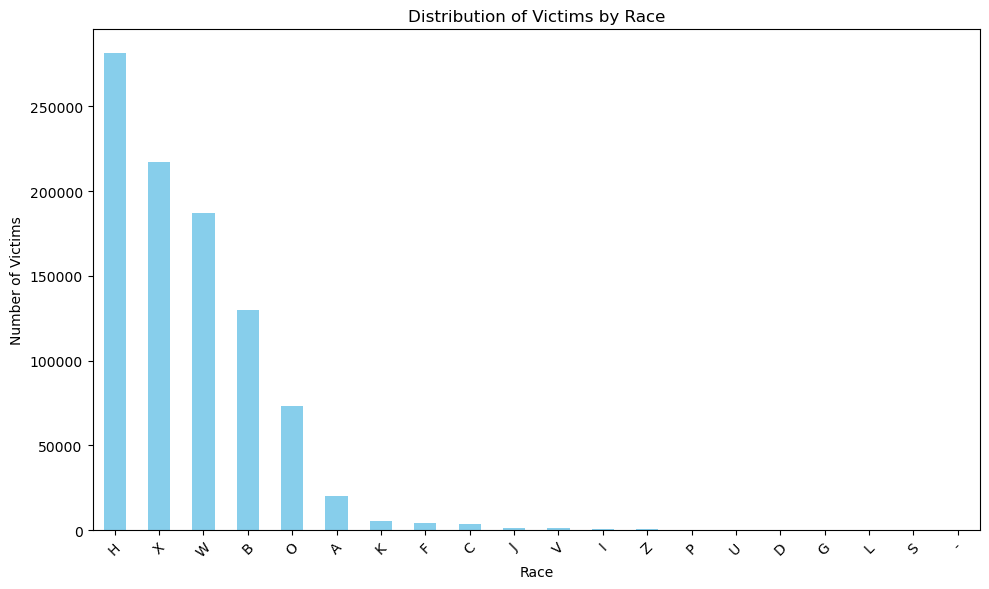

In [133]:
# Extract the counts of each race
race_counts = df2['Race'].value_counts()

# Plotting a bar chart
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Victims by Race')
plt.xlabel('Race')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [134]:
lat_unique_values = df2['LAT'].unique()
lon_unique_values = df2['LON'].unique()

In [135]:
print(df2['LON'].value_counts())

LON
-118.2739    7082
-118.2827    6086
-118.2915    3959
-118.2652    3947
-118.2871    3690
             ... 
-118.6578       1
-118.6331       1
-118.4904       1
-118.6351       1
-118.6323       1
Name: count, Length: 4976, dtype: int64


In [136]:
counting = df2['LON'].value_counts(dropna=False)
print(counting)

LON
-118.2739    7082
-118.2827    6086
-118.2915    3959
-118.2652    3947
-118.2871    3690
             ... 
-118.6578       1
-118.6331       1
-118.4904       1
-118.6351       1
-118.6323       1
Name: count, Length: 4976, dtype: int64


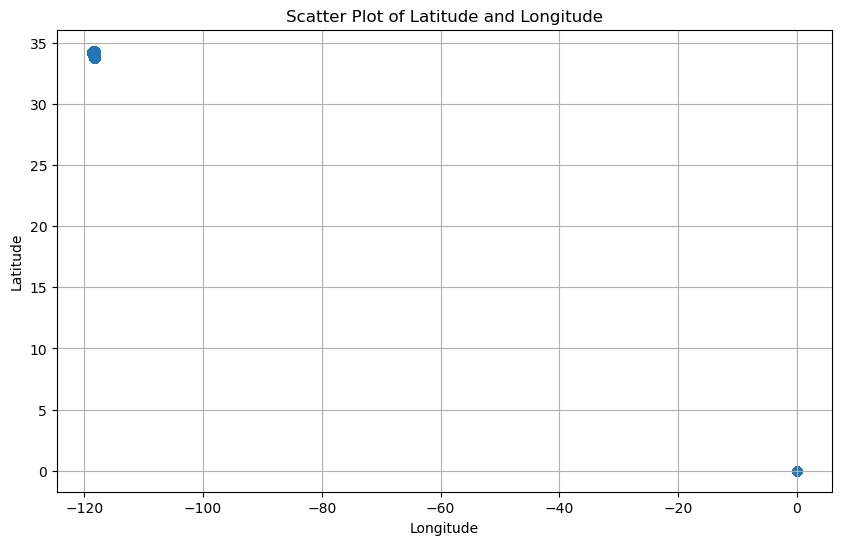

In [137]:
# Extract Latitude and Longitude data
latitude = df2['LAT']
longitude = df2['LON']

# Create a scatter plot to display Latitude and Longitude
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, alpha=0.5)
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [138]:
# Convert categorical variables into dummy/indicator variables
df2_encoded = pd.get_dummies(df2)

MemoryError: Unable to allocate 56.4 GiB for an array with shape (65412, 925719) and data type bool

In [114]:
df2.head(5)

,Division of Records,Crime date,Crime time,Vict Age,Vict Sex,Race,Crime Com,LOCATION,LAT,LON
0,190326475,2020-03-01,21:30,31,M,O,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,2020-02-08,18:00,47,M,O,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,2020-11-04,17:00,19,X,X,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,2020-03-10,20:37,19,M,O,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,2020-08-17,12:00,28,M,H,354.0,1900 TRANSIENT,34.0944,-118.3277


In [ ]:
grouped_data.fillna(0, inplace=True)

In [ ]:
count = df2['Race'].value_counts(dropna=False)
print(count)

In [ ]:
# Sample data (replace this with your actual data)
age_groups = ['0-10', '11-20', '21-30', '31-40', '41-50']
male_counts = [100, 150, 200, 180, 120]  # Example counts for males
female_counts = [80, 120, 150, 130, 90]  # Example counts for females

# Define the width of the bars
bar_width = 0.35

# Set the positions for the bars on the x-axis
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.bar(r1, male_counts, color='b', width=bar_width, edgecolor='grey', label='Male')
plt.bar(r2, female_counts, color='r', width=bar_width, edgecolor='grey', label='Female')

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Number of Victims')
plt.title('Number of Victims by Age Groups, Race, and Sex')
plt.xticks([r + bar_width/2 for r in range(len(age_groups))], age_groups)

# Add legend
plt.legend()

# Show plot

## 5. Profile Report

In [ ]:
#pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df2)

In [ ]:
unique_value = 'nan'
insight = df2[df2['Vict Sex'] == unique_value]
print(insight)

In [ ]:
old_vict_sex_H = 'H'
new_vict_sex_X = 'X'
df2['Vict Sex'] = df2['Vict Sex'].replace(old_vict_sex_H, new_vict_sex_X)
print(df2)

In [ ]:
df2

In [ ]:
from ydata_profiling import ProfileReport

### Observation ###

   - The dataset has 37 variables and 4424 attibutes
   - The dataset has 12 variables in float data type
   - The dataset has 19 variables in integer data type
   - The dataset has 6 variables in objet data type
   - There are no duplicate rows in the dataset  

In [ ]:
df2 = df1.drop(['variable', 'value'], axis=1)

In [ ]:
dfM = df.melt(['DR_NO', 'DATE OCC', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'LAT', 'LON'], ['Date Rptd', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Premis Cd', 'Premis Desc', 
        'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Cross Street'])

## 5. Data cleaning
Given the context of our dataset, which is a set of student data, there is a certain amount of what we call **irrelevant data**, which will be dropped. It seems to us to be the academic transcript of students. The data on the transcript depends on the school's policies. We have therefore decided to keep the variables that are useful and relevant to us, to avoid overloading the transcript.

In [ ]:
dfMelt = df.melt(['Course', 'Daytime/evening attendance', 'Nacionality', 'Admission grade', 'Gender', 'Age at enrollment', 
        'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 
        'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
        'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'GDP', 'Target'], 
        ['Marital status', 'Application mode', 'Application order', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation",
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Scholarship holder', 'International', 'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate'])

In [ ]:
dfMelt.head()

In [ ]:
dfMelt.shape

In [ ]:
dfMelt = dfMelt.drop(['variable', 'value'], axis=1)
dfMelt.head(20)

### Rename columns

In [ ]:
dfMelt.rename(columns = {'Nacionality':'Nationality', 'Daytime/evening attendance':'Daytime/Evening', 'Curricular units 1st sem (credited)':'Credits earned 1st sem', 
                         'Curricular units 1st sem (enrolled)':'Credits enrolled 1st sem', 'Curricular units 1st sem (approved)':'Credits approved 1st sem', 
                         'GDP':'GPA', 'Curricular units 1st sem (grade)':'1st sem Grade', 'Curricular units 2nd sem (credited)':'Credits earned 2nd sem',
                         'Curricular units 2nd sem (enrolled)':'Credits enrolled 2nd sem', 'Curricular units 2nd sem (approved)':'Credits approved 2nd sem',
                         'Curricular units 2nd sem (grade)':'2nd sem Grade', 'Age at enrollment':'age'}, inplace =True)

In [ ]:
dfMelt

### Order our variables for aesthetic reasons ###

In [ ]:
dfMelt.columns

In [ ]:
dfMelt=dfMelt[['Course', 'Daytime/Evening', 'Nationality', 'Gender', 'age',
       'Credits enrolled 1st sem', 'Credits approved 1st sem', 'Credits earned 1st sem',
       '1st sem Grade', 'Credits enrolled 2nd sem', 'Credits approved 2nd sem', 'Credits earned 2nd sem',
       '2nd sem Grade', 'GPA', 'Target', 'Admission grade']]

In [ ]:
dfMelt.head(5)

In [ ]:
print(dfMelt['1st sem Grade'].dtype)

### Drop lines with infinite values ###

In [ ]:
dfMelt = dfMelt.replace([np.inf, -np.inf]).dropna(subset=['1st sem Grade', '2nd sem Grade'])

### According to our student data dictionary, the type of the variables below is integer, so we're going to convert them ###

In [ ]:
dfMelt['1st sem Grade'] = dfMelt['1st sem Grade'].astype(int)
dfMelt['2nd sem Grade'] = dfMelt['2nd sem Grade'].astype(int)


In [ ]:
dfMelt.head(5)

### Replace categorical variables contained in 'Target' to numeric values ###

In [ ]:
dfMelt["Target"] = dfMelt["Target"].map({"Dropout":0,"Enrolled":1,"Graduate":2})

In [ ]:
dfMelt.head(10)

### It's more interesting to enter students' year of birth than their age. We'll calculate the year of birth ###

In [ ]:
import datetime as dt

In [ ]:
current_year = dt.datetime.now().year

In [ ]:
dfMelt['age'] = pd.to_numeric(dfMelt['age'], errors='coerce')

In [ ]:
dfMelt['Birth Year'] = current_year - dfMelt['age']

In [ ]:
dfMelt.head(10)

In [ ]:
dfMelt['Birth Year'] = dfMelt['Birth Year'].astype(float).astype(pd.Int32Dtype(), errors='ignore')

In [ ]:
dfMelt.head(10)

### Order our variables for aesthetic reasons again, without 'age' ###

In [ ]:
dfMelt=dfMelt[['Course', 'Daytime/Evening', 'Nationality', 'Gender', 'Birth Year',
       'Credits enrolled 1st sem', 'Credits approved 1st sem', 'Credits earned 1st sem',
       '1st sem Grade', 'Credits enrolled 2nd sem', 'Credits approved 2nd sem', 'Credits earned 2nd sem',
       '2nd sem Grade', 'GPA', 'Admission grade', 'Target']]

In [ ]:
dfMelt.head(5)

### It seems the variables 'Credits earned 1st sem' & 'Credit earned 2nd sem' have 0 like values everywhere, let see ###

In [ ]:
print(dfMelt['Credits earned 1st sem'])

In [ ]:
print(dfMelt['Credits earned 2nd sem'])

**It is not useful to keep them. So we are going to drop them**

In [ ]:
dfMelt = dfMelt.drop(['Credits earned 1st sem', 'Credits earned 2nd sem'], axis=1)
dfMelt.head(5)

In [ ]:
dfMelt.dtypes

In [ ]:
dfMelt[dfMelt == '?'] = np.nan

In [ ]:
dfMelt.info()

### Impute missing values with mode

In [ ]:
for col in ['Course', 'Birth Year', 'Credits enrolled 2nd sem', 'Target', 'Admission grade']:
    dfMelt[col].fillna(dfMelt[col].mode()[0], inplace=True)

### Check missing values

In [ ]:
dfMelt.isnull().sum()

## IV. Machine Learning

### 1. Setting feature vector and target variable

In [ ]:
X = dfMelt.drop(['Target'], axis=1)

y = dfMelt['Target']

In [ ]:
X.head()

### 2. Split data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 3. Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [ ]:
X_train.head()

In [ ]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(dfMelt)

### 4. Logistic Regression model with all features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

### 5. Logistic Regression with PCA

   #### The variance ratio 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

### Observation
The variance ratio indicates the proportion of the dataset’s variance that lies along the axis of each principal component.
 - We have approximately 99.7% of variance is explained by the first 12 variables.
 - Only 0.3% of variance is explained by the last variable. So, we can assume that it carries little information.
 - We are going to drop it and train the model again and calculate the accuracy.

### Logistic Regression model with 12 features

In [ ]:
X = dfMelt.drop(['Target', 'Admission grade'], axis=1)
y = dfMelt['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



### Observation
  - We can see that accuracy has not changed 0.7517 after dropping the last feature.
  - We are going to drop one more and train the model again and calculate the accuracy.

In [ ]:
X = dfMelt.drop(['Target', 'Admission grade', 'GPA'], axis=1)
y = dfMelt['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

### Observation   
   - We can see that accuracy has changed from 0.7517 to 0.7516 after dropping the last feature.
   - We are going to drop one more and train the model again and calculate the accuracy.

In [ ]:
X = dfMelt.drop(['Target', 'Admission grade', 'GPA', '2nd sem Grade'], axis=1)
y = dfMelt['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with 10 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

### Observation  
  - We can see that the accuracy has decreased to 0.7418 when we drop the last three features.
  - Our aim is to maximize the accuracy.

### 6. Number of features needed for retaining 99.5% variance in the data

In [ ]:
X = dfMelt.drop(['Target'], axis=1)
y = dfMelt['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.995) + 1
print('The number of dimensions required to preserve 99.5% of variance is',dim)

### 7. Plot explained variance ratio with number of dimensions

We'll plot the explained variance as a function of the number of dimensions, then look for a kink where the explained variance stops growing rapidly.
We can therefore consider this to be the dimensionality of the data set.

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Observation
    The above plot shows that almost 99% of variance is explained by the first 12 components.

The “Curse of Dimensionality ”can lead Overfitting. High-dimensional data increases the risk of overfitting, where a model captures noise or random fluctuations in the data rather than true underlying patterns. This can lead to poor generalization performance when the model is applied to new, unseen data.

## V. References
- Team, G.L. (2020). What is Curse of Dimensionality in Machine Learning? [online] GreatLearning Blog: Free Resources what Matters to shape your Career! Available at: https://www.mygreatlearning.com/blog/understanding-curse-of-dimensionality/.